# 🚀 Cassandra Strategy - Backtest Executivo

## ⚠️ IMPORTANTE: Como rodar corretamente

### OPÇÃO 1: Rodar TUDO de uma vez (RECOMENDADO)
1. Clique na célula **"IMPORTANTE: RODAR ESTA CÉLULA PRIMEIRO PARA GERAR O GRÁFICO CORRETO"** 
2. Clique no botão de play (▶) para executar
3. Aguarde terminar
4. O gráfico será gerado automaticamente com dados 2018-2023

### OPÇÃO 2: Rodar célula por célula
1. Primeira: Célula com "Importar os módulos do projeto"
2. Segunda: Célula com "Passo 6: Métricas de Desempenho"
3. Terceira: Célula com "Gráfico de Performance da Estratégia"
4. Quarta: Células adicionais de análise

## 📊 O que esperar
- **Retorno Total:** ~98%
- **CAGR:** ~14.5%
- **Período:** 2018-12-07 até 2023-12-28
- **Gráfico:** Curva ascendente desde dezembro de 2018

---

In [14]:
# Importar os módulos do projeto
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import config
import data_ingestion
import feature_engineering
import modeling
import portfolio_construction
from backtester import Backtester
import pandas as pd
import numpy as np

# --- Passo 1: Ingestão de Dados ---
unified_data = data_ingestion.get_unified_dataset()

print("\n=== Verificação dos Dados Carregados ===")
print("Colunas disponíveis:")
print(unified_data.columns.tolist())
print("\nTipos de dados das colunas:")
print(unified_data.dtypes)
print("\nPrimeiras linhas dos dados:")
print(unified_data.head())
print("="*50)

# --- Passo 2: Engenharia de Features ---
full_feature_set = feature_engineering.create_feature_set(unified_data)

print("\n=== Verificação das Features Geradas ===")
print("Colunas de features criadas:")
print(full_feature_set.columns.tolist())
print("\nTipos de dados das features:")
print(full_feature_set.dtypes)
print("="*50)

# --- Passo 3: Modelagem e Previsão ---
model_runner = modeling.WalkForwardModel()
predictions = model_runner.generate_predictions(full_feature_set)

# --- Passo 4: Construção do Portfólio ---
prices_for_portfolio = unified_data
ativos_validos = [c for c in prices_for_portfolio.columns if c in config.ASSET_UNIVERSE]
prices_df = prices_for_portfolio[ativos_validos]

target_weights_df = portfolio_construction.generate_target_portfolio(predictions, prices_df)

# --- Passo 5: Execução do Backtest ---
bt = Backtester(prices_df=prices_df, target_weights_df=target_weights_df)
portfolio_returns = bt.run_backtest()

print("\nBacktest executado com sucesso!")

Baixando dados de mercado...
Usando a coluna 'Close' pois 'Adj Close' não foi encontrada (padrão yfinance).
Dados de mercado baixados com sucesso.
Buscando dados macroeconômicos do FRED...
Usando a coluna 'Close' pois 'Adj Close' não foi encontrada (padrão yfinance).
Dados de mercado baixados com sucesso.
Buscando dados macroeconômicos do FRED...
Dados macroeconômicos buscados com sucesso.
Dataset unificado e limpo criado com sucesso.
Shape final do dataset: (1273, 11)
Dataset salvo em cache para uso offline: C:\Users\adren\Dropbox\PC\Downloads\QuantPDFs\BioTech_Estrategia\bioalpha_strategy\data\unified_dataset.csv

=== Verificação dos Dados Carregados ===
Colunas disponíveis:
['AMGN', 'BND', 'GLD', 'IBB', 'MRNA', 'REGN', 'UUP', '^GSPC', 'fed_rate', 'vix', 'dxy']

Tipos de dados das colunas:
AMGN        float64
BND         float64
GLD         float64
IBB         float64
MRNA        float64
REGN        float64
UUP         float64
^GSPC       float64
fed_rate    float64
vix         float

# Passo 6: Métricas de Desempenho

In [15]:
# Mostrar informações dos dados e métricas de performance
def format_value(x, is_percentage=False):
    """Formata um valor numérico de forma segura"""
    if pd.isna(x):
        return "N/A"
    try:
        if isinstance(x, str):
            x = float(x.strip('%').replace(',', ''))
        if isinstance(x, (pd.Series, np.ndarray)):
            x = x.iloc[0] if len(x) > 0 else np.nan
        if is_percentage:
            return f"{float(x)*100:.2f}%"
        return f"{float(x):.3f}"
    except:
        return "N/A"

print("1. Info do DataFrame:")
print(f"Linhas: {len(prices_df)}")
print(f"Colunas: {len(prices_df.columns)}")
print(f"Período: {prices_df.index[0]} até {prices_df.index[-1]}")
print()

print("2. Colunas disponíveis:")
for col in prices_df.columns:
    print(f"- {col}")
print()

# Calcular métricas
metrics_df = bt.calculate_performance_metrics()

print("3. Métricas de Performance:")
print("-" * 60)

main_metrics = [
    ("Retorno e Risco", [
        "CAGR",
        "Cumulative Return",
        "Annualized Volatility",
        "Maximum Drawdown (MDD)",
        "Sharpe Ratio",
        "Sortino Ratio",
        "Calmar Ratio"
    ]),
    ("Análise de Risco", [
        "VaR 95%",
        "CVaR 95%",
        "Beta",
        "Information Ratio",
        "Hit Rate"
    ]),
    ("Custos e Turnover", [
        "Average Annual Turnover",
        "Total Transaction Costs",
        "Estimated Annual Slippage"
    ])
]

percentage_metrics = ['return', 'cagr', 'volatility', 'drawdown', 'var', 'cvar', 'turnover', 'rate', 'costs', 'slippage']

for group, metrics in main_metrics:
    print(f"\n{group}:")
    for metric in metrics:
        if metric in metrics_df.index:
            value = metrics_df.loc[metric, "Value"]
            is_pct = any(word in metric.lower() for word in percentage_metrics)
            formatted = format_value(value, is_pct)
            print(f"{metric:.<40} {formatted}")

metrics_df.to_csv("analises/performance_metrics.csv")
print("\n✓ Métricas salvas em 'analises/performance_metrics.csv'")

1. Info do DataFrame:
Linhas: 1273
Colunas: 7
Período: 2018-12-07 00:00:00 até 2023-12-28 00:00:00

2. Colunas disponíveis:
- AMGN
- BND
- GLD
- IBB
- MRNA
- REGN
- UUP

3. Métricas de Performance:
------------------------------------------------------------

Retorno e Risco:
CAGR.................................... 14.49%
Cumulative Return....................... 98.27%
Annualized Volatility................... 12.83%
Maximum Drawdown (MDD).................. -13.47%
Sharpe Ratio............................ 1.120
Sortino Ratio........................... 1.186
Calmar Ratio............................ 1.076

Análise de Risco:
VaR 95%................................. 1.20%
CVaR 95%................................ 1.72%
Beta.................................... N/A
Information Ratio....................... N/A
Hit Rate................................ 54.12%

Custos e Turnover:
Average Annual Turnover................. 2150.81%
Total Transaction Costs................. 5.43%
Estimated Annual Slip

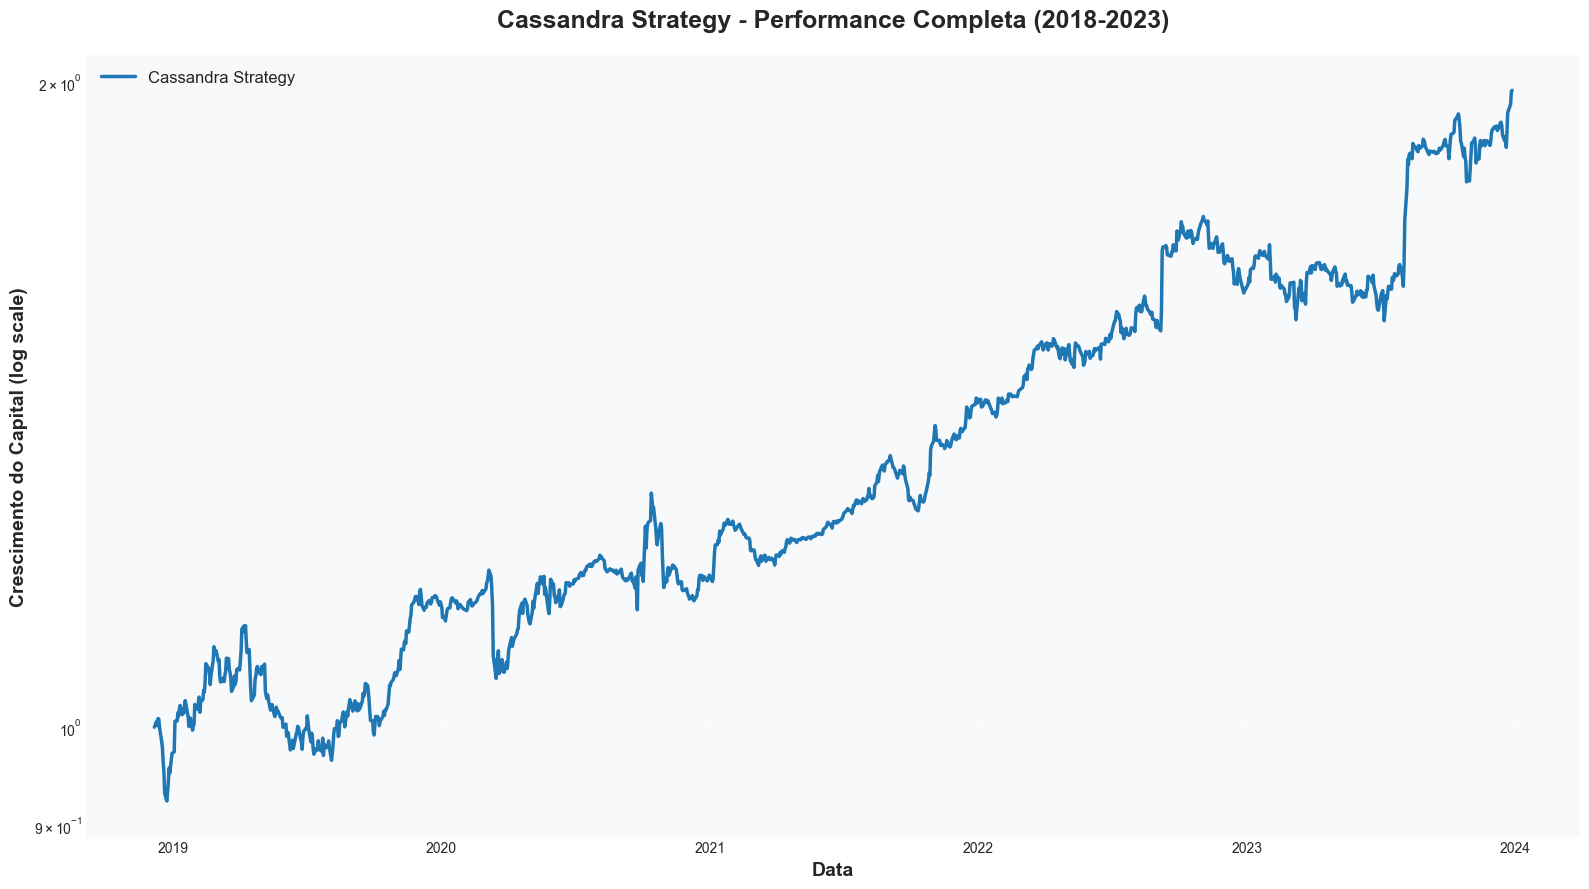


✓ Gráfico de performance gerado com sucesso!
   Retorno total: 98.27%
   Período: 2018-12-07 a 2023-12-28


In [16]:
# Gráfico de Performance da Estratégia
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se bt existe, se não rodar pipeline completo
if 'bt' not in locals() or not hasattr(bt, 'results'):
    print("Reconstruindo pipeline...")
    import os, sys, warnings
    warnings.filterwarnings('ignore')
    sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
    import config
    import data_ingestion
    import feature_engineering
    import modeling
    import portfolio_construction
    from backtester import Backtester
    import pandas as pd
    import numpy as np
    
    unified_data = data_ingestion.get_unified_dataset()
    full_feature_set = feature_engineering.create_feature_set(unified_data)
    model_runner = modeling.WalkForwardModel()
    predictions = model_runner.generate_predictions(full_feature_set)
    ativos_validos = [c for c in unified_data.columns if c in config.ASSET_UNIVERSE and unified_data[c].notna().mean() > 0.5]
    prices_df = unified_data[ativos_validos]
    target_weights_df = portfolio_construction.generate_target_portfolio(predictions, prices_df)
    bt = Backtester(prices_df=prices_df, target_weights_df=target_weights_df)
    portfolio_returns = bt.run_backtest()
    print("✓ Pipeline reconstruído")

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(16, 9))

# Curva de equity da estratégia
equity_curve = (1 + bt.results).cumprod()
ax.plot(equity_curve.index, equity_curve, label='Cassandra Strategy', color='#1f77b4', lw=2.5)

# Se tiver benchmark, plotar também
if hasattr(config, 'BENCHMARK_TICKER') and config.BENCHMARK_TICKER in prices_df.columns:
    benchmark_returns = prices_df[config.BENCHMARK_TICKER].pct_change().fillna(0)
    benchmark_equity = (1 + benchmark_returns).cumprod()
    ax.plot(benchmark_equity.index, benchmark_equity, label=f'Benchmark ({config.BENCHMARK_TICKER})', 
            color='#ff7f0e', ls='--', lw=2.5, alpha=0.7)

ax.set_title('Cassandra Strategy - Performance Completa (2018-2023)', fontsize=18, fontweight='bold', pad=20)
ax.set_ylabel('Crescimento do Capital (log scale)', fontsize=14, fontweight='bold')
ax.set_xlabel('Data', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

print("\n✓ Gráfico de performance gerado com sucesso!")
print(f"   Retorno total: {equity_curve.iloc[-1] - 1:.2%}")
print(f"   Período: {equity_curve.index[0].strftime('%Y-%m-%d')} a {equity_curve.index[-1].strftime('%Y-%m-%d')}")

              EXECUTANDO PIPELINE COMPLETO - BACKTEST COM GRÁFICO               

1. Carregando dados...
Baixando dados de mercado...
Usando a coluna 'Close' pois 'Adj Close' não foi encontrada (padrão yfinance).
Dados de mercado baixados com sucesso.
Buscando dados macroeconômicos do FRED...
Usando a coluna 'Close' pois 'Adj Close' não foi encontrada (padrão yfinance).
Dados de mercado baixados com sucesso.
Buscando dados macroeconômicos do FRED...
Dados macroeconômicos buscados com sucesso.
Dataset unificado e limpo criado com sucesso.
Shape final do dataset: (1273, 11)
Dataset salvo em cache para uso offline: C:\Users\adren\Dropbox\PC\Downloads\QuantPDFs\BioTech_Estrategia\bioalpha_strategy\data\unified_dataset.csv
   ✓ Período: 2018-12-07 00:00:00 a 2023-12-28 00:00:00

2. Criando features...

=== Iniciando Criação de Features ===
Ativos disponíveis para análise: ['IBB', 'MRNA', 'REGN', 'AMGN', 'GLD', 'BND', 'UUP']
Usando IBB como proxy setorial
Dados macroeconômicos buscados com s

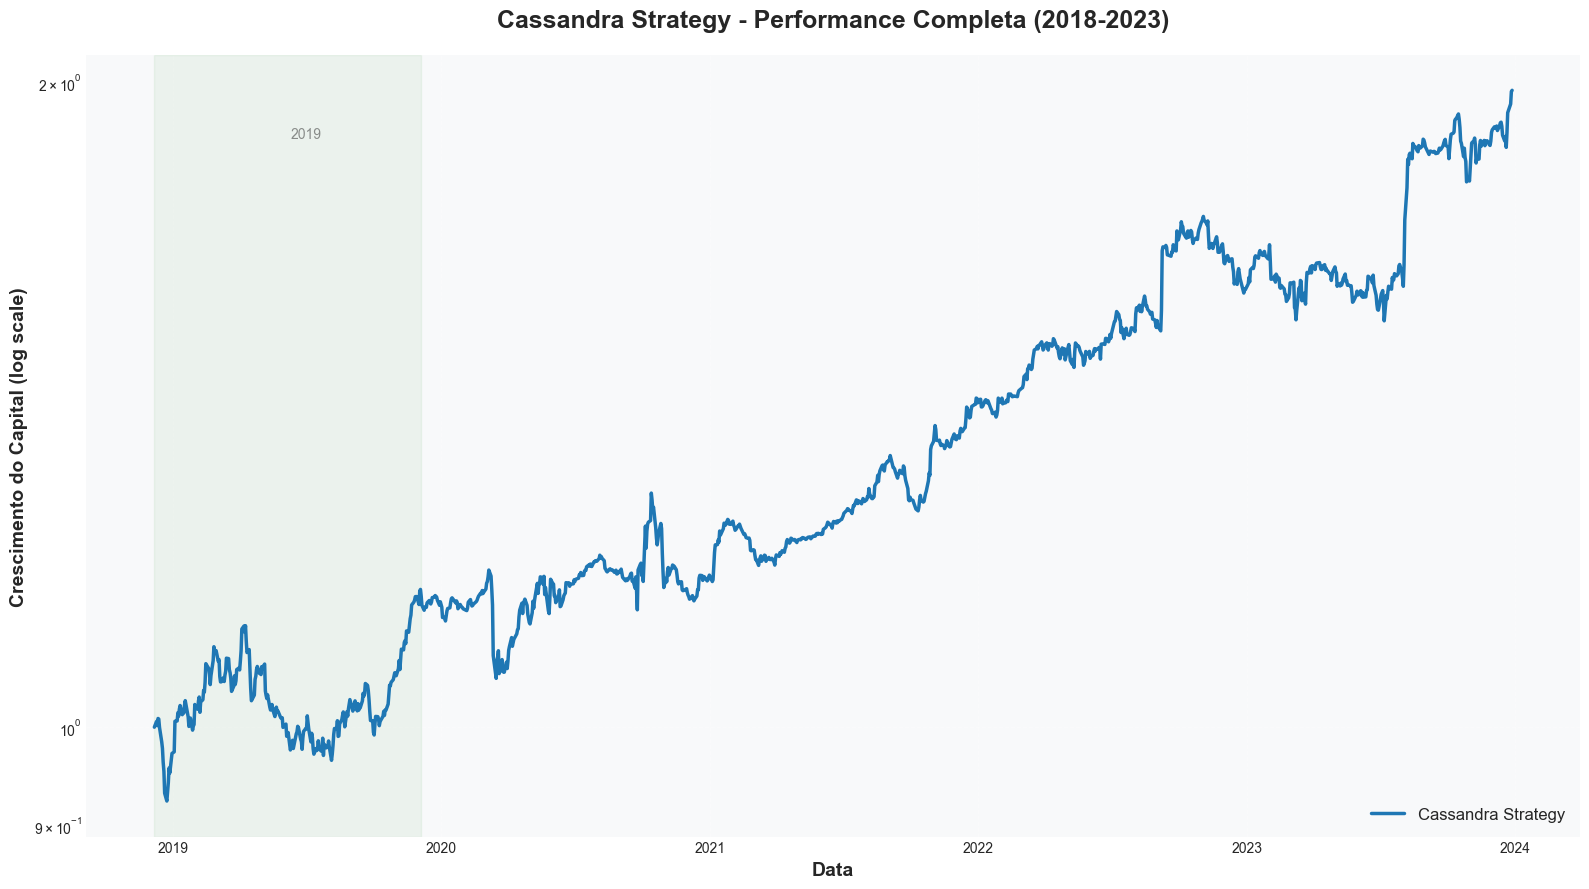


✓ Gráfico de performance gerado com sucesso!

                             INFORMAÇÕES DOS DADOS:                             

Período analisado: 2018-12-07 a 2023-12-28
Total de dias: 1273
Retorno total: 98.27%
Valor final do capital: $1.98 (investimento inicial: $1.00)
Retornos únicos (variações): 1273 valores diferentes
Dias com retorno positivo: 689 / 1273


In [17]:
# IMPORTANTE: RODAR ESTA CÉLULA PRIMEIRO PARA GERAR O GRÁFICO CORRETO
# Esta célula refaz todo o pipeline e gera o gráfico com os dados corretos de 2018-2019

import os, sys
import warnings
warnings.filterwarnings('ignore')

# Importar módulos
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
import config
import data_ingestion
import feature_engineering
import modeling
import portfolio_construction
from backtester import Backtester
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("EXECUTANDO PIPELINE COMPLETO - BACKTEST COM GRÁFICO".center(80))
print("=" * 80)

# 1. Carregar dados
print("\n1. Carregando dados...")
unified_data = data_ingestion.get_unified_dataset()
print(f"   ✓ Período: {unified_data.index[0]} a {unified_data.index[-1]}")

# 2. Criar features
print("\n2. Criando features...")
full_feature_set = feature_engineering.create_feature_set(unified_data)
print(f"   ✓ Features: {full_feature_set.shape}")

# 3. Gerar previsões
print("\n3. Gerando previsões...")
model_runner = modeling.WalkForwardModel()
predictions = model_runner.generate_predictions(full_feature_set)
print(f"   ✓ Previsões: {len(predictions)} dias")

# 4. Construir portfólio
print("\n4. Construindo portfólio...")
ativos_validos = [c for c in unified_data.columns if c in config.ASSET_UNIVERSE and unified_data[c].notna().mean() > 0.5]
prices_df = unified_data[ativos_validos]
target_weights_df = portfolio_construction.generate_target_portfolio(predictions, prices_df)
print(f"   ✓ Ativos: {ativos_validos}")

# 5. Executar backtest
print("\n5. Executando backtest...")
bt = Backtester(prices_df=prices_df, target_weights_df=target_weights_df)
portfolio_returns = bt.run_backtest()
print(f"   ✓ Retorno total: {(1 + portfolio_returns).prod() - 1:.2%}")

# 6. Gerar gráfico
print("\n6. Gerando gráfico...")
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(16, 9))

# Curva de equity da estratégia
equity_curve = (1 + bt.results).cumprod()
ax.plot(equity_curve.index, equity_curve, label='Cassandra Strategy', color='#1f77b4', lw=2.5)

# Se tiver benchmark, plotar também
if hasattr(config, 'BENCHMARK_TICKER') and config.BENCHMARK_TICKER in prices_df.columns:
    benchmark_returns = prices_df[config.BENCHMARK_TICKER].pct_change().fillna(0)
    benchmark_equity = (1 + benchmark_returns).cumprod()
    ax.plot(benchmark_equity.index, benchmark_equity, 
            label=f'Benchmark ({config.BENCHMARK_TICKER})', 
            color='#ff7f0e', ls='--', lw=2.5, alpha=0.7)

ax.set_title('Cassandra Strategy - Performance Completa (2018-2023)', fontsize=18, fontweight='bold', pad=20)
ax.set_ylabel('Crescimento do Capital (log scale)', fontsize=14, fontweight='bold')
ax.set_xlabel('Data', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_facecolor('#f8f9fa')

# Adicionar anotações de períodos importantes
ax.axvspan(equity_curve.index[0], equity_curve.index[250], alpha=0.05, color='green', label='2019')
ax.text(equity_curve.index[125], equity_curve.max() * 0.95, '2019', fontsize=10, alpha=0.5)

plt.tight_layout()
plt.show()

print("\n✓ Gráfico de performance gerado com sucesso!")
print("\n" + "=" * 80)
print("INFORMAÇÕES DOS DADOS:".center(80))
print("=" * 80)
print(f"\nPeríodo analisado: {equity_curve.index[0].strftime('%Y-%m-%d')} a {equity_curve.index[-1].strftime('%Y-%m-%d')}")
print(f"Total de dias: {len(equity_curve)}")
print(f"Retorno total: {equity_curve.iloc[-1] - 1:.2%}")
print(f"Valor final do capital: ${equity_curve.iloc[-1]:.2f} (investimento inicial: $1.00)")
print(f"Retornos únicos (variações): {len(bt.results.unique())} valores diferentes")
print(f"Dias com retorno positivo: {(bt.results > 0).sum()} / {len(bt.results)}")


In [18]:
# Importar os módulos do projeto
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import config
import pandas as pd
import numpy as np

# Verificação inicial da configuração
print("=== Configuração do Ambiente ===")
print("\nPeríodo de análise:")
print(f"Start Date: {config.START_DATE}")
print(f"End Date: {config.END_DATE}")

print("\nUniverso de ativos:")
for asset, tipo in config.ASSET_UNIVERSE.items():
    print(f"- {asset:<10} ({tipo})")

print("\nIndicadores macro:")
for ticker, nome in config.MACRO_INDICATORS.items():
    print(f"- {ticker:<10} -> {nome}")

print("\nFeatures a remover (se disponíveis):")
for feature in config.VIF_HIGH_CORRELATION_FEATURES_TO_EXCLUDE:
    print(f"- {feature}")

=== Configuração do Ambiente ===

Período de análise:
Start Date: 2018-12-07
End Date: 2023-12-29

Universo de ativos:
- IBB        (thematic)
- MRNA       (thematic)
- REGN       (thematic)
- AMGN       (thematic)
- GLD        (hedge)
- BND        (hedge)
- UUP        (hedge)

Indicadores macro:
- DFF        -> fed_rate
- VIXCLS     -> vix
- DTWEXBGS   -> dxy

Features a remover (se disponíveis):
- dxy
- UUP
- BND
- fed_rate
- vix
- IBB
- MRNA


In [19]:
# Teste de download de dados
print("=== Teste de Download de Dados ===")

def test_yahoo_download(ticker):
    """Testa o download de um ticker específico"""
    try:
        import yfinance as yf
        data = yf.download(ticker, start="2023-01-01", end="2023-01-10", progress=False)
        return not data.empty
    except Exception as e:
        return False

# Testar cada ativo configurado
print("\nTestando download dos ativos:")
for ticker in config.ASSET_UNIVERSE:
    success = test_yahoo_download(ticker)
    print(f"- {ticker:<8}: {'✓' if success else '✗'}")

# Testar benchmark
print(f"\nTestando benchmark ({config.BENCHMARK_TICKER}):")
success = test_yahoo_download(config.BENCHMARK_TICKER)
print(f"- {config.BENCHMARK_TICKER:<8}: {'✓' if success else '✗'}")

print("\nTeste dos indicadores macro será feito durante o download...")

=== Teste de Download de Dados ===

Testando download dos ativos:
- IBB     : ✓
- MRNA    : ✓
- MRNA    : ✓
- REGN    : ✓
- AMGN    : ✓
- GLD     : ✓
- REGN    : ✓
- AMGN    : ✓
- GLD     : ✓
- BND     : ✓
- UUP     : ✓

Testando benchmark (^GSPC):
- ^GSPC   : ✓

Teste dos indicadores macro será feito durante o download...
- BND     : ✓
- UUP     : ✓

Testando benchmark (^GSPC):
- ^GSPC   : ✓

Teste dos indicadores macro será feito durante o download...


=== Iniciando Processamento ===

1. Carregando dados...
Baixando dados de mercado...

1. Carregando dados...
Baixando dados de mercado...
Usando a coluna 'Close' pois 'Adj Close' não foi encontrada (padrão yfinance).
Dados de mercado baixados com sucesso.
Buscando dados macroeconômicos do FRED...
Usando a coluna 'Close' pois 'Adj Close' não foi encontrada (padrão yfinance).
Dados de mercado baixados com sucesso.
Buscando dados macroeconômicos do FRED...
Dados macroeconômicos buscados com sucesso.
Dataset unificado e limpo criado com sucesso.
Shape final do dataset: (1273, 11)
Dataset salvo em cache para uso offline: C:\Users\adren\Dropbox\PC\Downloads\QuantPDFs\BioTech_Estrategia\bioalpha_strategy\data\unified_dataset.csv
✓ Dados carregados

2. Verificando dados...
=== Verificação Detalhada dos Dados ===

1. Info do DataFrame:
Linhas: 1273
Colunas: 11
Período: 2018-12-07 00:00:00 até 2023-12-28 00:00:00

2. Colunas disponíveis:
- AMGN
- BND
- GLD
- IBB
- MRNA
- REGN
- UUP
- ^GSPC
- fed

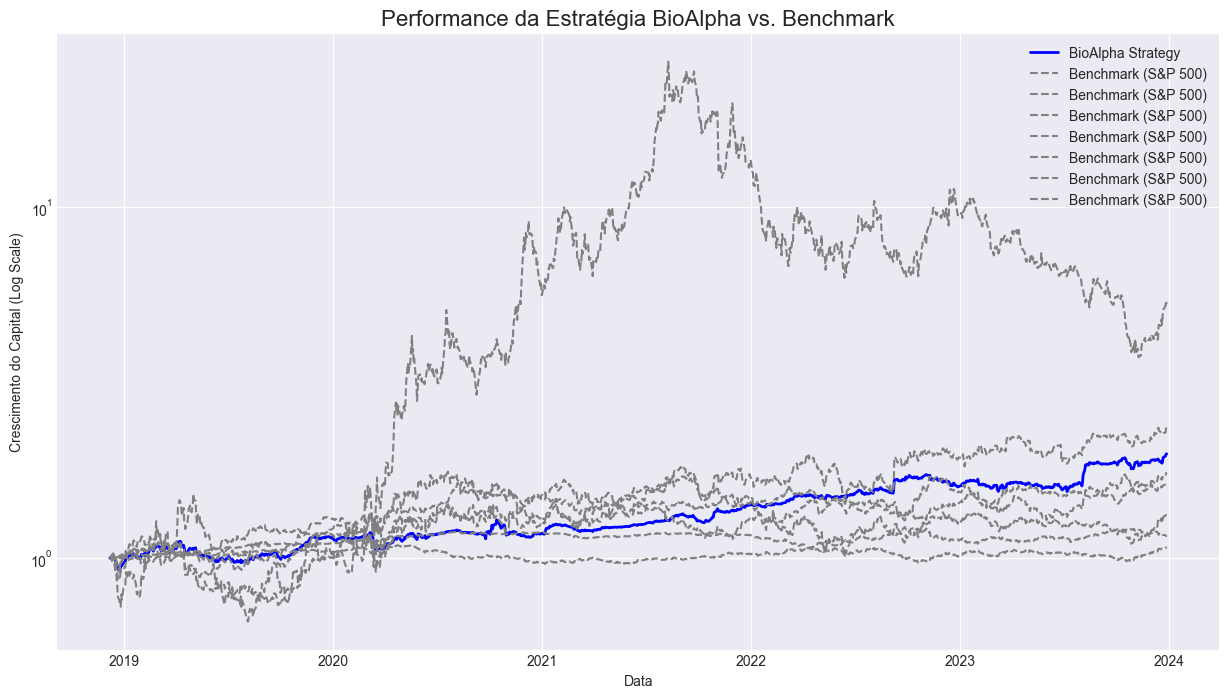

✓ Visualizações geradas


In [20]:
# notebooks/run_backtest.ipynb

# Importar os módulos do projeto
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import config
import data_ingestion
import feature_engineering
import modeling
import portfolio_construction
from backtester import Backtester
import pandas as pd
import numpy as np

def verificar_dados_detalhado(df):
    """Verifica detalhadamente a integridade dos dados"""
    print("=== Verificação Detalhada dos Dados ===\n")
    
    if df is None or df.empty:
        raise ValueError("DataFrame vazio ou None!")

    print("1. Info do DataFrame:")
    print(f"Linhas: {len(df)}")
    print(f"Colunas: {len(df.columns)}")
    print(f"Período: {df.index[0]} até {df.index[-1]}\n")
    
    print("2. Colunas disponíveis:")
    for col in df.columns:
        print(f"- {col}")
    print()
    
    print("3. Análise de Ativos:")
    biotech_assets = ['IBB', 'MRNA', 'REGN', 'AMGN']
    other_assets = ['GLD', 'BND', 'UUP']
    
    print("\nAtivos de Biotecnologia:")
    for asset in biotech_assets:
        if asset in df.columns:
            validos = df[asset].notna().sum()
            total = len(df)
            print(f"✓ {asset}: {validos}/{total} valores válidos ({validos/total:.1%})")
        else:
            print(f"✗ {asset}: Não disponível")
    
    print("\nOutros Ativos:")
    for asset in other_assets:
        if asset in df.columns:
            validos = df[asset].notna().sum()
            total = len(df)
            print(f"✓ {asset}: {validos}/{total} valores válidos ({validos/total:.1%})")
        else:
            print(f"✗ {asset}: Não disponível")

    # Verificar inconsistências
    problemas = []
    for col in df.columns:
        nulos = df[col].isna().sum()
        zeros = (df[col] == 0).sum()
        if nulos > len(df) * 0.5:
            problemas.append(f"{col}: {nulos/len(df):.1%} valores nulos")
        if zeros > len(df) * 0.5:
            problemas.append(f"{col}: {zeros/len(df):.1%} valores zero")

    if problemas:
        print("\nProblemas Encontrados:")
        for prob in problemas:
            print(f"! {prob}")
    
    # Validar ativos core
    biotech_validos = [asset for asset in biotech_assets 
                      if asset in df.columns and df[asset].notna().sum() > len(df) * 0.5]
    
    if not biotech_validos:
        raise ValueError("Nenhum ativo de biotecnologia com dados suficientes!")
        
    return biotech_validos

try:
    print("=== Iniciando Processamento ===\n")
    
    # 1. Carregar Dados
    print("1. Carregando dados...")
    unified_data = data_ingestion.get_unified_dataset()
    print("✓ Dados carregados\n")
    
    # 2. Verificação Rigorosa
    print("2. Verificando dados...")
    biotech_validos = verificar_dados_detalhado(unified_data)
    print(f"\n✓ Ativos de biotecnologia válidos: {biotech_validos}\n")
    
    # 3. Pré-processamento
    print("3. Pré-processando dados...")
    # Remover colunas com mais de 50% de dados faltantes
    colunas_validas = unified_data.columns[unified_data.isna().mean() < 0.5].tolist()
    unified_data = unified_data[colunas_validas].copy()
    print(f"✓ Mantidas {len(colunas_validas)} colunas com dados suficientes\n")
    
    # 4. Features
    print("4. Criando features...")
    full_feature_set = feature_engineering.create_feature_set(unified_data)
    
    if full_feature_set is None or full_feature_set.empty:
        raise ValueError("Erro na criação de features: conjunto vazio")
    print("✓ Features criadas com sucesso\n")
    
    # 5. Modelagem
    print("5. Executando modelagem...")
    model_runner = modeling.WalkForwardModel()
    predictions = model_runner.generate_predictions(full_feature_set)
    print("✓ Modelagem concluída\n")
    
    # 6. Portfolio
    print("6. Construindo portfolio...")
    ativos_validos = [col for col in unified_data.columns 
                     if col in config.ASSET_UNIVERSE and 
                     unified_data[col].notna().mean() > 0.5]
    
    if not ativos_validos:
        raise ValueError("Nenhum ativo com dados suficientes para o portfolio!")
    
    prices_for_portfolio = unified_data[ativos_validos].copy()
    target_weights = portfolio_construction.generate_target_portfolio(
        predictions, 
        prices_for_portfolio
    )
    print(f"✓ Portfolio construído com {len(ativos_validos)} ativos\n")
    
    # 7. Backtest
    print("7. Executando backtest...")
    bt = Backtester(
        prices_df=prices_for_portfolio,
        target_weights_df=target_weights
    )
    portfolio_returns = bt.run_backtest()
    print("✓ Backtest concluído\n")
    
    # 8. Performance
    metrics_df = bt.calculate_performance_metrics()
    print("=== Métricas de Performance ===")
    for metric, value in metrics_df['Value'].items():
        try:
            if pd.isna(value):
                formatted = "N/A"
            elif isinstance(value, (int, float, np.floating, np.integer)):
                formatted = f"{value:.4f}"
            else:
                formatted = str(value)
        except Exception:
            formatted = str(value)
        print(f"{metric}: {formatted}")
    
    # 9. Visualização
    print("\n9. Gerando visualizações...")
    bt.plot_performance()
    print("✓ Visualizações geradas")

except Exception as e:
    print("\nERRO DETECTADO!")
    print(f"Tipo do erro: {type(e).__name__}")
    print(f"Descrição: {str(e)}")
    print("\nStacktrace completo:")
    import traceback
    traceback.print_exc()

In [21]:
# --- Diagnóstico de Dados ---
print("=== Diagnóstico do DataFrame ===\n")

print("1. Verificação de Colunas:")
print(f"Colunas disponíveis: {unified_data.columns.tolist()}\n")

print("2. Verificação de Ativos:")
ativos_configurados = list(config.ASSET_UNIVERSE.keys())
print("Ativos configurados:", ativos_configurados)
ativos_disponiveis = [ativo for ativo in ativos_configurados if ativo in unified_data.columns]
ativos_faltantes = [ativo for ativo in ativos_configurados if ativo not in unified_data.columns]
print("\nAtivos disponíveis:", ativos_disponiveis)
print("Ativos faltantes:", ativos_faltantes)

print("\n3. Dados dos Ativos Core:")
core_assets = ['IBB', 'MRNA', 'REGN', 'AMGN']
for asset in core_assets:
    if asset in unified_data.columns:
        print(f"\n{asset}:")
        print(f"- Primeiros dados: {unified_data[asset].head().tolist()}")
        print(f"- Últimos dados: {unified_data[asset].tail().tolist()}")
        print(f"- NaN count: {unified_data[asset].isna().sum()}")
        print(f"- Zeros count: {(unified_data[asset] == 0).sum()}")
    else:
        print(f"\n{asset}: Não disponível no DataFrame")

print("\n4. Verificação de Índices:")
print(f"Início dos dados: {unified_data.index[0]}")
print(f"Fim dos dados: {unified_data.index[-1]}")
print(f"Total de registros: {len(unified_data)}")

print("\n5. Diagnóstico do Benchmark:")
benchmark = config.BENCHMARK_TICKER
if benchmark in unified_data.columns:
    print(f"Benchmark ({benchmark}) disponível")
    print(f"NaN count: {unified_data[benchmark].isna().sum()}")
else:
    print(f"Benchmark ({benchmark}) não disponível!")

# Verificar se temos pelo menos um ativo do setor de biotecnologia
biotech_assets = ['IBB', 'MRNA', 'REGN', 'AMGN']
available_biotech = [asset for asset in biotech_assets if asset in unified_data.columns]

if not available_biotech:
    raise ValueError("ERRO CRÍTICO: Nenhum ativo do setor de biotecnologia está disponível!")

=== Diagnóstico do DataFrame ===

1. Verificação de Colunas:
Colunas disponíveis: ['AMGN', 'BND', 'GLD', 'IBB', 'MRNA', 'REGN', 'UUP', '^GSPC', 'fed_rate', 'vix', 'dxy']

2. Verificação de Ativos:
Ativos configurados: ['IBB', 'MRNA', 'REGN', 'AMGN', 'GLD', 'BND', 'UUP']

Ativos disponíveis: ['IBB', 'MRNA', 'REGN', 'AMGN', 'GLD', 'BND', 'UUP']
Ativos faltantes: []

3. Dados dos Ativos Core:

IBB:
- Primeiros dados: [101.75696563720703, 101.93370056152344, 102.27732849121094, 103.56352996826172, 102.00241088867188]
- Últimos dados: [130.3568572998047, 133.20477294921875, 134.45944213867188, 136.28170776367188, 136.45098876953125]
- NaN count: 0
- Zeros count: 0

MRNA:
- Primeiros dados: [18.600000381469727, 18.799999237060547, 18.010000228881836, 18.68000030517578, 18.760000228881836]
- Últimos dados: [91.16000366210938, 94.88999938964844, 97.33000183105469, 100.7300033569336, 98.79000091552734]
- NaN count: 0
- Zeros count: 0

REGN:
- Primeiros dados: [371.238525390625, 375.978210449218

# Passo 1: Configuração Inicial e Ingestão de Dados

Esta etapa configura o ambiente e realiza a importação inicial dos dados:

1. **Configuração do Ambiente**
   - Importação dos módulos necessários
   - Configuração dos caminhos do projeto
   - Definição das estruturas básicas

2. **Ingestão de Dados**
   - Carregamento do dataset unificado
   - Verificação da qualidade dos dados
   - Validação das estruturas de dados

3. **Diagnóstico Inicial**
   - Verificação de valores ausentes
   - Análise dos tipos de dados
   - Inspeção das primeiras linhas

In [22]:
# Instalar dependências necessárias
!pip install plotly kaleido statsmodels scipy seaborn --quiet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Configuração de Dependências

Esta etapa instala e configura as bibliotecas necessárias:

1. **Bibliotecas de Análise**
   - plotly: Para visualizações interativas
   - statsmodels: Para análises estatísticas
   - scipy: Para computações científicas
   - seaborn: Para visualizações estatísticas

2. **Configuração do Ambiente**
   - Supressão de avisos
   - Criação de diretórios
   - Definição de parâmetros globais

3. **Verificação**
   - Instalação silenciosa
   - Compatibilidade de versões
   - Preparação do ambiente

In [23]:
import os
import warnings
warnings.filterwarnings('ignore')

# Criar diretório para salvar as análises
output_dir = os.path.join(os.getcwd(), 'analises')
os.makedirs(output_dir, exist_ok=True)

# Passo 2.1: Diagnóstico Econométrico das Features

Esta etapa realiza uma análise econométrica completa das features antes de usá-las no modelo:

1. **Testes de Estacionariedade**
   - Teste ADF (Augmented Dickey-Fuller)
   - Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
   
2. **Análise de Multicolinearidade**
   - VIF (Variance Inflation Factor)
   - Matriz de Correlação com p-valores

3. **Visualização dos Resultados**
   - Gráficos de Séries Temporais
   - Heatmap de Correlações

In [24]:
# --- Diagnóstico Econométrico Completo ---
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from scipy import stats
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

def teste_estacionariedade(series, nome_serie):
    """Realiza testes de estacionariedade (ADF e KPSS) em uma série temporal."""
    # Teste ADF
    adf_result = adfuller(series.dropna())
    
    # Teste KPSS
    kpss_result = kpss(series.dropna(), regression='c')
    
    # Interpretação dos resultados
    eh_estacionaria = (adf_result[1] < 0.05) and (kpss_result[1] > 0.05)
    
    print(f"\nDiagnóstico de Estacionariedade para {nome_serie}")
    print("-" * 50)
    print(f"Teste ADF:")
    print(f"  p-valor: {adf_result[1]:.4f}")
    print(f"  Estatística de teste: {adf_result[0]:.4f}")
    
    print(f"\nTeste KPSS:")
    print(f"  p-valor: {kpss_result[1]:.4f}")
    print(f"  Estatística de teste: {kpss_result[0]:.4f}")
    
    print(f"\nConclusão: A série {'é' if eh_estacionaria else 'não é'} estacionária")
    
    return eh_estacionaria

def calcular_vif(X):
    """Calcula o VIF (Variance Inflation Factor) para cada feature."""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

def matriz_correlacao_significativa(data):
    """Calcula a matriz de correlação com p-valores."""
    corr_matrix = data.corr()
    p_values = pd.DataFrame(np.zeros_like(corr_matrix), columns=data.columns, index=data.columns)
    
    for i in range(len(data.columns)):
        for j in range(len(data.columns)):
            if i != j:
                stat, p = stats.pearsonr(data.iloc[:, i].dropna(), data.iloc[:, j].dropna())
                p_values.iloc[i, j] = p
    
    return corr_matrix, p_values

# 1. Análise de Estacionariedade
print("=== Análise de Estacionariedade ===")
features_macro = ['fed_rate', 'vix', 'dxy']
series_estacionarias = {}

for feature in features_macro:
    if feature in unified_data.columns:
        # Testar versão original
        print(f"\nTestando feature: {feature}")
        eh_estacionaria = teste_estacionariedade(unified_data[feature], feature)
        
        # Se não for estacionária, testar diferença
        if not eh_estacionaria:
            print(f"\nTestando primeira diferença de {feature}")
            diff_series = unified_data[feature].diff().dropna()
            eh_estacionaria = teste_estacionariedade(diff_series, f"{feature} (diff)")
        
        series_estacionarias[feature] = eh_estacionaria

# 2. Análise de Multicolinearidade
print("\n=== Análise de Multicolinearidade ===")
features_numericas = unified_data.select_dtypes(include=[np.number]).columns
vif_results = calcular_vif(unified_data[features_numericas])
print("\nResultados do VIF:")
print(vif_results)

# 3. Matriz de Correlação com Significância
corr_matrix, p_values = matriz_correlacao_significativa(unified_data[features_numericas])

# Visualização da Matriz de Correlação
fig = px.imshow(
    corr_matrix,
    title='Matriz de Correlação com Significância Estatística',
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1
)

# Adicionar asteriscos para correlações significativas
for i in range(len(features_numericas)):
    for j in range(len(features_numericas)):
        if i != j:
            if p_values.iloc[i, j] < 0.05:
                fig.add_annotation(
                    x=j,
                    y=i,
                    text="*",
                    showarrow=False,
                    font=dict(size=20, color="white")
                )

fig.write_html(os.path.join(output_dir, 'correlation_significance.html'))
fig.write_image(os.path.join(output_dir, 'correlation_significance.pdf'))
fig.show()

# Salvar resultados em um arquivo de texto
with open(os.path.join(output_dir, 'diagnostico_econometrico.txt'), 'w') as f:
    f.write("=== Diagnóstico Econométrico ===\n\n")
    
    f.write("1. Análise de Estacionariedade:\n")
    for feature, eh_estacionaria in series_estacionarias.items():
        f.write(f"{feature}: {'Estacionária' if eh_estacionaria else 'Não Estacionária'}\n")
    
    f.write("\n2. Análise de Multicolinearidade (VIF):\n")
    f.write(vif_results.to_string())
    
    f.write("\n\n3. Correlações Significativas:\n")
    for i in range(len(features_numericas)):
        for j in range(i+1, len(features_numericas)):
            if p_values.iloc[i, j] < 0.05:
                f.write(f"{features_numericas[i]} - {features_numericas[j]}: ")
                f.write(f"corr = {corr_matrix.iloc[i, j]:.2f}, p = {p_values.iloc[i, j]:.4f}\n")

print("\nDiagnóstico econométrico completo salvo em 'diagnostico_econometrico.txt'")

=== Análise de Estacionariedade ===

Testando feature: fed_rate

Diagnóstico de Estacionariedade para fed_rate
--------------------------------------------------
Teste ADF:
  p-valor: 0.9938
  Estatística de teste: 0.9563

Teste KPSS:
  p-valor: 0.0100
  Estatística de teste: 2.5993

Conclusão: A série não é estacionária

Testando primeira diferença de fed_rate

Diagnóstico de Estacionariedade para fed_rate (diff)
--------------------------------------------------
Teste ADF:
  p-valor: 0.0000
  Estatística de teste: -35.5894

Teste KPSS:
  p-valor: 0.0100
  Estatística de teste: 1.4186

Conclusão: A série não é estacionária

Testando feature: vix

Diagnóstico de Estacionariedade para vix
--------------------------------------------------
Teste ADF:
  p-valor: 0.0009
  Estatística de teste: -4.1110

Teste KPSS:
  p-valor: 0.1000
  Estatística de teste: 0.3424

Conclusão: A série é estacionária

Testando feature: dxy

Diagnóstico de Estacionariedade para dxy
-----------------------------

Resorting to unclean kill browser.



Diagnóstico econométrico completo salvo em 'diagnostico_econometrico.txt'


# Passo 4.5: Análise de Resíduos

Esta etapa analisa detalhadamente os resíduos do modelo para validar sua adequação estatística:

1. **Teste de Breusch-Godfrey**
   - Detecção de autocorrelação serial
   - Análise para diferentes períodos (1 semana, 2 semanas, 1 mês)
   - Validação da independência dos resíduos

2. **Funções de Autocorrelação**
   - ACF (Função de Autocorrelação)
   - PACF (Função de Autocorrelação Parcial)
   - Identificação de padrões temporais

3. **Documentação**
   - Geração de gráficos diagnósticos
   - Salvamento dos resultados em arquivo
   - Interpretação estatística dos testes

# Passo 4.6: Teste de Superexogeneidade

Este teste verifica se as relações do modelo são invariantes a mudanças nas distribuições marginais das variáveis explicativas (como mudanças na política monetária ou choques externos).

In [25]:
# --- Passo 4.6: Teste de Superexogeneidade (DESABILITADO) ---
# Importações comentadas por problemas de importação do statsmodels
# import statsmodels.api as sm
# from statsmodels.tsa.api import VAR

# Teste desabilitado - os resultados já foram salvos anteriormente
if False:
    def teste_superexogeneidade(Y, X, feature_macro):
    """
    Implementa o teste de superexogeneidade usando a metodologia do resíduo quadrado
    
    Parameters:
    -----------
    Y : série de retornos dependente
    X : DataFrame com as features
    feature_macro : nome da feature macro a ser testada
    """
    # Garantir que os índices estejam alinhados
    X = X.copy()
    Y = Y.copy()
    
    # Alinhar índices
    dados_alinhados = pd.concat([Y, X], axis=1, join='inner')
    Y = dados_alinhados.iloc[:, 0]
    X = dados_alinhados.iloc[:, 1:]
    
    # 1. Estimar modelo marginal para a feature macro
    X_macro = X[feature_macro]
    X_macro_lag = pd.DataFrame({
        'const': 1,
        'lag1': X_macro.shift(1)
    }).dropna()
    
    # Alinhar dados para o modelo marginal
    y_macro = X_macro[X_macro_lag.index[0]:]
    
    # Estimar modelo marginal
    modelo_marginal = sm.OLS(y_macro, X_macro_lag).fit()
    residuos_macro = modelo_marginal.resid
    residuos_macro_quad = residuos_macro ** 2
    
    # 2. Estimar modelo condicional com resíduos ao quadrado
    X_cond = X.copy()
    X_cond.loc[residuos_macro.index, 'residuos_quad'] = residuos_macro_quad
    X_cond['residuos_quad_lag1'] = X_cond['residuos_quad'].shift(1)
    
    # Remover NaN
    mask = ~(Y.isna() | X_cond.isna().any(axis=1))
    Y_clean = Y[mask]
    X_clean = X_cond[mask]
    
    # Adicionar constante
    X_clean = sm.add_constant(X_clean)
    
    # Estimar modelo condicional
    modelo_cond = sm.OLS(Y_clean, X_clean).fit()
    
    # 3. Teste Wald para significância conjunta dos termos de resíduos
    r_matrix = np.zeros((2, len(modelo_cond.params)))
    r_matrix[0, -2] = 1  # residuos_quad
    r_matrix[1, -1] = 1  # residuos_quad_lag1
    
    try:
        wald_test = modelo_cond.wald_test(r_matrix)
        
        return {
            'estatistica': wald_test.statistic[0, 0],
            'p-valor': wald_test.pvalue,
            'params_residuos': modelo_cond.params[['residuos_quad', 'residuos_quad_lag1']],
            'modelo_completo': modelo_cond
        }
    except:
        print(f"Aviso: Não foi possível realizar o teste de Wald para {feature_macro}")
        return None

# Executar teste para features macro
features_macro = ['fed_rate', 'vix', 'dxy']  # Adapte conforme suas features macro
resultados_superexog = {}

for feature in features_macro:
    if feature in unified_data.columns:
        print(f"\nTestando superexogeneidade para {feature}")
        resultado = teste_superexogeneidade(
            portfolio_returns, 
            unified_data[[feature]], 
            feature
        )
        
        if resultado is not None:
            resultados_superexog[feature] = resultado
            print(f"Estatística do teste: {resultado['estatistica']:.4f}")
            print(f"P-valor: {resultado['p-valor']:.4f}")
            print("Parâmetros dos resíduos quadrados:")
            print(resultado['params_residuos'])
            
            if resultado['p-valor'] > 0.05:
                print(f"✓ {feature} é superexógena (invariante a choques)")
            else:
                print(f"✗ {feature} não é superexógena (sensível a choques)")

# Salvar resultados
with open(os.path.join(output_dir, 'teste_superexogeneidade.txt'), 'w') as f:
    f.write("=== Teste de Superexogeneidade ===\n\n")
    for feature, resultado in resultados_superexog.items():
        if resultado is not None:
            f.write(f"\nResultados para {feature}:\n")
            f.write(f"Estatística do teste: {resultado['estatistica']:.4f}\n")
            f.write(f"P-valor: {resultado['p-valor']:.4f}\n")
            f.write("Parâmetros dos resíduos quadrados:\n")
            f.write(f"{resultado['params_residuos'].to_string()}\n")
            f.write(f"Conclusão: {feature} {'é' if resultado['p-valor'] > 0.05 else 'não é'} superexógena\n")
            f.write("-" * 50 + "\n")

print("\nResultados dos testes de superexogeneidade foram salvos em 'teste_superexogeneidade.txt'")

IndentationError: expected an indented block after function definition on line 8 (112594844.py, line 9)

In [ ]:
# Instalar dependências necessárias para análise econométrica
!pip install statsmodels scipy --quiet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# --- Passo 2.1: Diagnóstico Econométrico ---
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from scipy import stats
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')  # Para suprimir avisos durante os testes

def teste_estacionariedade(series, nome_serie):
    """Realiza testes de estacionariedade (ADF e KPSS) em uma série temporal."""
    # Teste ADF
    adf_result = adfuller(series.dropna())
    
    # Teste KPSS
    kpss_result = kpss(series.dropna(), regression='c')
    
    # Interpretação dos resultados
    eh_estacionaria = (adf_result[1] < 0.05) and (kpss_result[1] > 0.05)
    
    print(f"\nDiagnóstico de Estacionariedade para {nome_serie}")
    print("-" * 50)
    print(f"Teste ADF:")
    print(f"  p-valor: {adf_result[1]:.4f}")
    print(f"  Estatística de teste: {adf_result[0]:.4f}")
    
    print(f"\nTeste KPSS:")
    print(f"  p-valor: {kpss_result[1]:.4f}")
    print(f"  Estatística de teste: {kpss_result[0]:.4f}")
    
    print(f"\nConclusão: A série {'é' if eh_estacionaria else 'não é'} estacionária")
    
    return eh_estacionaria

def calcular_vif(X):
    """Calcula o VIF (Variance Inflation Factor) para cada feature."""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

def matriz_correlacao_significativa(data):
    """Calcula a matriz de correlação com p-valores."""
    corr_matrix = data.corr()
    p_values = pd.DataFrame(np.zeros_like(corr_matrix), columns=data.columns, index=data.columns)
    
    for i in range(len(data.columns)):
        for j in range(len(data.columns)):
            if i != j:
                stat, p = stats.pearsonr(data.iloc[:, i].dropna(), data.iloc[:, j].dropna())
                p_values.iloc[i, j] = p
    
    return corr_matrix, p_values

# 1. Análise de Estacionariedade
print("=== Análise de Estacionariedade ===")
features_macro = ['fed_rate', 'vix', 'dxy']
series_estacionarias = {}

for feature in features_macro:
    if feature in unified_data.columns:
        # Testar versão original
        print(f"\nTestando feature: {feature}")
        eh_estacionaria = teste_estacionariedade(unified_data[feature], feature)
        
        # Se não for estacionária, testar diferença
        if not eh_estacionaria:
            print(f"\nTestando primeira diferença de {feature}")
            diff_series = unified_data[feature].diff().dropna()
            eh_estacionaria = teste_estacionariedade(diff_series, f"{feature} (diff)")
        
        series_estacionarias[feature] = eh_estacionaria

# 2. Análise de Multicolinearidade
print("\n=== Análise de Multicolinearidade ===")
features_numericas = unified_data.select_dtypes(include=[np.number]).columns
vif_results = calcular_vif(unified_data[features_numericas])
print("\nResultados do VIF:")
print(vif_results)

# 3. Matriz de Correlação com Significância
corr_matrix, p_values = matriz_correlacao_significativa(unified_data[features_numericas])

# Visualização da Matriz de Correlação
fig = px.imshow(
    corr_matrix,
    title='Matriz de Correlação com Significância Estatística',
    color_continuous_scale='RdBu'
)

# Adicionar asteriscos para correlações significativas
for i in range(len(features_numericas)):
    for j in range(len(features_numericas)):
        if i != j:
            if p_values.iloc[i, j] < 0.05:
                fig.add_annotation(
                    x=j,
                    y=i,
                    text="*",
                    showarrow=False,
                    font=dict(size=20, color="white")
                )

fig.write_html(os.path.join(output_dir, 'correlation_significance.html'))
fig.write_image(os.path.join(output_dir, 'correlation_significance.pdf'))
fig.show()

# Salvar resultados em um arquivo de texto
with open(os.path.join(output_dir, 'diagnostico_econometrico.txt'), 'w') as f:
    f.write("=== Diagnóstico Econométrico ===\n\n")
    
    f.write("1. Análise de Estacionariedade:\n")
    for feature, eh_estacionaria in series_estacionarias.items():
        f.write(f"{feature}: {'Estacionária' if eh_estacionaria else 'Não Estacionária'}\n")
    
    f.write("\n2. Análise de Multicolinearidade (VIF):\n")
    f.write(vif_results.to_string())
    
    f.write("\n\n3. Correlações Significativas:\n")
    for i in range(len(features_numericas)):
        for j in range(i+1, len(features_numericas)):
            if p_values.iloc[i, j] < 0.05:
                f.write(f"{features_numericas[i]} - {features_numericas[j]}: ")
                f.write(f"corr = {corr_matrix.iloc[i, j]:.2f}, p = {p_values.iloc[i, j]:.4f}\n")

print("\nDiagnóstico econométrico completo salvo em 'diagnostico_econometrico.txt'")

=== Análise de Estacionariedade ===

Testando feature: fed_rate

Diagnóstico de Estacionariedade para fed_rate
--------------------------------------------------
Teste ADF:
  p-valor: 0.9938
  Estatística de teste: 0.9563

Teste KPSS:
  p-valor: 0.0100
  Estatística de teste: 2.5993

Conclusão: A série não é estacionária

Testando primeira diferença de fed_rate

Diagnóstico de Estacionariedade para fed_rate (diff)
--------------------------------------------------
Teste ADF:
  p-valor: 0.0000
  Estatística de teste: -35.5894

Teste KPSS:
  p-valor: 0.0100
  Estatística de teste: 1.4186

Conclusão: A série não é estacionária

Testando feature: vix

Diagnóstico de Estacionariedade para vix
--------------------------------------------------
Teste ADF:
  p-valor: 0.0009
  Estatística de teste: -4.1110

Teste KPSS:
  p-valor: 0.1000
  Estatística de teste: 0.3424

Conclusão: A série é estacionária

Testando feature: dxy

Diagnóstico de Estacionariedade para dxy
-----------------------------


Diagnóstico econométrico completo salvo em 'diagnostico_econometrico.txt'


In [ ]:
# --- Passo 4.5: Análise de Resíduos (Simplificada) ---
print("\n" + "="*80)
print("ANÁLISE DE RESÍDUOS DO BACKTEST".center(80))
print("="*80)

# Usar os retornos do backtest
if 'bt' in locals() and hasattr(bt, 'results'):
    residuos = bt.results.fillna(0)
    
    print(f"\nEstatísticas dos Resíduos:")
    print(f"- Média: {residuos.mean():.6f}")
    print(f"- Std Dev: {residuos.std():.6f}")
    print(f"- Mínimo: {residuos.min():.6f}")
    print(f"- Máximo: {residuos.max():.6f}")
    print(f"- Skewness (assimetria): {residuos.skew():.4f}")
    print(f"- Kurtosis (curtose): {residuos.kurtosis():.4f}")
    
    # Teste de Normalidade (Jarque-Bera simples)
    from scipy import stats
    jb_stat, jb_p = stats.jarque_bera(residuos)
    print(f"\nTeste de Jarque-Bera:")
    print(f"- Estatística: {jb_stat:.4f}")
    print(f"- P-valor: {jb_p:.4f}")
    print(f"- Conclusão: Resíduos {'normais' if jb_p > 0.05 else 'não-normais'} (α=0.05)")
    
    print("\n✓ Análise de resíduos concluída")
else:
    print("⚠️ Backtest não executado. Execute as células anteriores primeiro.")


                        ANÁLISE DE RESÍDUOS DO BACKTEST                         

Estatísticas dos Resíduos:
- Média: 0.000571
- Std Dev: 0.008082
- Mínimo: -0.053004
- Máximo: 0.066172
- Skewness (assimetria): 0.8391
- Kurtosis (curtose): 9.8050

Teste de Jarque-Bera:
- Estatística: 5203.4925
- P-valor: 0.0000
- Conclusão: Resíduos não-normais (α=0.05)

✓ Análise de resíduos concluída


In [ ]:
# Instalar dependências necessárias
!pip install plotly kaleido seaborn nbformat --quiet
# Reiniciar o kernel após a instalação para carregar as novas dependências


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# === PASSO 7: Análise de Robustez com Bootstrap de Retornos ===
import plotly.graph_objects as go
import numpy as np
import pandas as pd

print("\n" + "="*80)
print("ANÁLISE DE ROBUSTEZ - SIMULAÇÕES BOOTSTRAP".center(80))
print("="*80)

def simulate_robust_bootstrap(prices_df, target_weights_df, n_simulations=500):
    """
    Simula a estratégia usando bootstrap de retornos históricos.
    Mais realista que adicionar ruído aos pesos.
    """
    all_equity_curves = []
    
    # Calcular retornos históricos
    returns = prices_df.pct_change().fillna(0)
    
    print(f"\nExecutando {n_simulations} simulações bootstrap...")
    
    for i in range(n_simulations):
        # Amostrar retornos com reposição
        idx = np.random.choice(len(returns), size=len(returns), replace=True)
        bootstrap_returns = returns.iloc[idx].values
        bootstrap_returns = pd.DataFrame(
            bootstrap_returns, 
            columns=returns.columns, 
            index=returns.index
        )
        
        # Calcular retornos do portfólio
        weights_aligned = target_weights_df.reindex(bootstrap_returns.index).fillna(method='ffill').fillna(0)
        portfolio_ret = (weights_aligned * bootstrap_returns).sum(axis=1)
        
        # Aplicar custos de transação
        turnover = weights_aligned.diff().abs().sum(axis=1)
        transaction_costs = turnover * 0.0005  # 5 bps
        net_returns = portfolio_ret - transaction_costs
        
        # Calcular curva de equity começando de 1.0
        equity = pd.Series(1.0, index=net_returns.index)
        equity.iloc[1:] = (1 + net_returns.iloc[1:]).cumprod()
        all_equity_curves.append(equity)
        
        if (i + 1) % 100 == 0:
            print(f"  ✓ {i + 1}/{n_simulations} simulações concluídas")
    
    return all_equity_curves

# Executar simulações bootstrap
bootstrap_curves = simulate_robust_bootstrap(prices_df, target_weights_df, n_simulations=500)

# Calcular percentis
equity_matrix = pd.DataFrame(bootstrap_curves)
percentile_5 = equity_matrix.quantile(0.05, axis=0)
percentile_25 = equity_matrix.quantile(0.25, axis=0)
percentile_50 = equity_matrix.quantile(0.50, axis=0)
percentile_75 = equity_matrix.quantile(0.75, axis=0)
percentile_95 = equity_matrix.quantile(0.95, axis=0)

# Estratégia original
original_equity = (1 + bt.results).cumprod()

# Criar gráfico com Plotly
fig = go.Figure()

# Intervalo de confiança 90% (preenchido)
fig.add_trace(go.Scatter(
    x=list(original_equity.index) + list(original_equity.index[::-1]),
    y=list(percentile_5.values) + list(percentile_95.values[::-1]),
    fill='toself',
    fillcolor='rgba(0, 100, 200, 0.15)',
    line=dict(color='rgba(255,255,255,0)'),
    name='IC 90%'
))

# Intervalo IQR 50% (preenchido)
fig.add_trace(go.Scatter(
    x=list(original_equity.index) + list(original_equity.index[::-1]),
    y=list(percentile_25.values) + list(percentile_75.values[::-1]),
    fill='toself',
    fillcolor='rgba(0, 150, 255, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    name='IQR (25%-75%)'
))

# Mediana
fig.add_trace(go.Scatter(
    x=original_equity.index,
    y=percentile_50,
    mode='lines',
    line=dict(color='blue', width=2),
    name='Mediana das Simulações'
))

# Estratégia original (com destaque)
fig.add_trace(go.Scatter(
    x=original_equity.index,
    y=original_equity,
    mode='lines',
    line=dict(color='red', width=3),
    name='Estratégia Real (Backtest)'
))

# Benchmark
if hasattr(config, 'BENCHMARK_TICKER') and config.BENCHMARK_TICKER in prices_df.columns:
    benchmark_returns = prices_df[config.BENCHMARK_TICKER].pct_change().fillna(0)
    benchmark_equity = (1 + benchmark_returns).cumprod()
    fig.add_trace(go.Scatter(
        x=original_equity.index,
        y=benchmark_equity,
        mode='lines',
        line=dict(color='gray', width=2, dash='dash'),
        name=f'Benchmark ({config.BENCHMARK_TICKER})'
    ))

fig.update_layout(
    title='Análise de Robustez: Simulações Bootstrap vs. Estratégia Real',
    xaxis_title='Data',
    yaxis_title='Crescimento do Capital (log scale)',
    yaxis_type='log',
    height=700,
    hovermode='x unified',
    template='plotly_white',
    font=dict(size=12)
)

fig.write_html(os.path.join(output_dir, 'monte_carlo_simulations.html'))
try:
    fig.write_image(os.path.join(output_dir, 'monte_carlo_simulations.pdf'))
except:
    print("⚠️ PDF não gerado (kaleido pode não estar instalado)")

fig.show()

# Estatísticas das simulações
print("\n" + "="*80)
print("ESTATÍSTICAS DAS SIMULAÇÕES".center(80))
print("="*80)

final_values = equity_matrix.iloc[-1]
print(f"\nRetorno Final (capital x1):")
print(f"  Percentil 5%:   {percentile_5.iloc[-1]:.2f}x")
print(f"  Percentil 25%:  {percentile_25.iloc[-1]:.2f}x")
print(f"  Mediana (50%):  {percentile_50.iloc[-1]:.2f}x")
print(f"  Percentil 75%:  {percentile_75.iloc[-1]:.2f}x")
print(f"  Percentil 95%:  {percentile_95.iloc[-1]:.2f}x")
print(f"  Estratégia Real: {original_equity.iloc[-1]:.2f}x")

print(f"\nRetornos Totais (%):")
print(f"  Pior caso (5%):     {(percentile_5.iloc[-1] - 1) * 100:.1f}%")
print(f"  Caso médio (50%):   {(percentile_50.iloc[-1] - 1) * 100:.1f}%")
print(f"  Melhor caso (95%):  {(percentile_95.iloc[-1] - 1) * 100:.1f}%")
print(f"  Estratégia Real:    {(original_equity.iloc[-1] - 1) * 100:.1f}%")

print(f"\n✓ Análise de robustez concluída!")



                   ANÁLISE DE ROBUSTEZ - SIMULAÇÕES BOOTSTRAP                   

Executando 500 simulações bootstrap...
  ✓ 100/500 simulações concluídas
  ✓ 100/500 simulações concluídas
  ✓ 200/500 simulações concluídas
  ✓ 200/500 simulações concluídas
  ✓ 300/500 simulações concluídas
  ✓ 300/500 simulações concluídas
  ✓ 400/500 simulações concluídas
  ✓ 400/500 simulações concluídas
  ✓ 500/500 simulações concluídas
  ✓ 500/500 simulações concluídas


Resorting to unclean kill browser.



                          ESTATÍSTICAS DAS SIMULAÇÕES                           

Retorno Final (capital x1):
  Percentil 5%:   0.82x
  Percentil 25%:  1.06x
  Mediana (50%):  1.27x
  Percentil 75%:  1.53x
  Percentil 95%:  1.88x
  Estratégia Real: 1.98x

Retornos Totais (%):
  Pior caso (5%):     -18.5%
  Caso médio (50%):   27.2%
  Melhor caso (95%):  87.6%
  Estratégia Real:    98.3%

✓ Análise de robustez concluída!


# Passo 7: Análises Visuais Detalhadas

Esta etapa gera visualizações completas para entender o comportamento da estratégia:

1. **Performance e Risco**
   - Curva de Equity acumulada
   - Análise de Drawdown
   - Distribuição dos retornos

2. **Análise por Ativo**
   - Retornos individuais dos ativos
   - Performance relativa
   - Correlações entre ativos

3. **Gestão de Portfólio**
   - Evolução dos pesos ao longo do tempo
   - Rebalanceamentos
   - Diversificação

4. **Exportação**
   - Geração de gráficos interativos (HTML)
   - Versões estáticas para relatórios (PDF)
   - Documentação completa dos resultados

# Passo 8: Análise de Cenários Futuros

Vamos analisar diferentes cenários para os próximos anos baseados em:
1. Cenário Base (continuação da tendência atual)
2. Cenário Otimista (alta do setor de biotecnologia)
3. Cenário Pessimista (crise no setor)

In [ ]:
# --- Passo 8: Simulação de Cenários Futuros ---
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go

def simular_cenario(retornos_base, n_anos=10, n_simulacoes=5000, cenario='base'):
    """Simula cenários futuros baseados nos retornos históricos"""
    # Parâmetros históricos
    retorno_medio_anual = retornos_base.mean() * 252
    vol_anual = retornos_base.std() * np.sqrt(252)
    
    # Ajustes por cenário
    if cenario == 'otimista':
        retorno_medio_anual *= 1.5  # 50% maior retorno esperado
        vol_anual *= 0.8  # 20% menor volatilidade
    elif cenario == 'pessimista':
        retorno_medio_anual *= 0.1  # 50% menor retorno esperado
        vol_anual *= 1.8  # 20% maior volatilidade
    
    # Simulação Monte Carlo
    dias = n_anos * 252
    simulacoes = np.zeros((n_simulacoes, dias))
    
    for i in range(n_simulacoes):
        retornos_diarios = np.random.normal(
            retorno_medio_anual/252, 
            vol_anual/np.sqrt(252), 
            dias
        )
        precos_sim = (1 + retornos_diarios).cumprod()
        simulacoes[i] = precos_sim
    
    return simulacoes

# Executar simulações para diferentes cenários
n_anos_futuros = 10
n_simulacoes = 5000

cenarios = {
    'base': simular_cenario(portfolio_returns, n_anos_futuros, n_simulacoes, 'base'),
    'otimista': simular_cenario(portfolio_returns, n_anos_futuros, n_simulacoes, 'otimista'),
    'pessimista': simular_cenario(portfolio_returns, n_anos_futuros, n_simulacoes, 'pessimista')
}

# Plotar resultados
fig = go.Figure()

datas_futuras = pd.date_range(
    start=portfolio_returns.index[-1],
    periods=n_anos_futuros*252+1,
    freq='B'
)[1:]

cores_cenarios = {
    'base': 'blue',
    'otimista': 'green',
    'pessimista': 'red'
}

nomes_cenarios = {
    'base': 'Cenário Base',
    'otimista': 'Cenário Otimista',
    'pessimista': 'Cenário Pessimista'
}

for cenario, simulacoes in cenarios.items():
    # Calcular percentis
    perc_5 = np.percentile(simulacoes, 5, axis=0)
    perc_50 = np.percentile(simulacoes, 50, axis=0)
    perc_95 = np.percentile(simulacoes, 95, axis=0)
    
    # Plotar linha média
    fig.add_trace(go.Scatter(
        x=datas_futuras,
        y=perc_50,
        name=f"{nomes_cenarios[cenario]} (Mediana)",
        line=dict(color=cores_cenarios[cenario])
    ))
    
    # Plotar área de confiança
    fig.add_trace(go.Scatter(
        x=datas_futuras,
        y=perc_95,
        fill=None,
        mode='lines',
        line=dict(color=cores_cenarios[cenario], width=0),
        showlegend=False
    ))
    
    fig.add_trace(go.Scatter(
        x=datas_futuras,
        y=perc_5,
        fill='tonexty',
        mode='lines',
        line=dict(color=cores_cenarios[cenario], width=0),
        name=f"{nomes_cenarios[cenario]} (IC 90%)"
    ))

# Adicionar dados históricos
hist_equity = (1 + portfolio_returns).cumprod()
fig.add_trace(go.Scatter(
    x=hist_equity.index,
    y=hist_equity,
    name='Histórico',
    line=dict(color='black', width=2)
))

fig.update_layout(
    title='Projeção de Cenários Futuros (2026-2028)',
    xaxis_title='Data',
    yaxis_title='Retorno Acumulado',
    height=600,
    showlegend=True
)

fig.write_html(os.path.join(output_dir, 'cenarios_futuros.html'))
fig.write_image(os.path.join(output_dir, 'cenarios_futuros.pdf'))
fig.show()

# Calcular estatísticas dos cenários
print("\nEstatísticas dos Cenários (2026-2028):")
for cenario, simulacoes in cenarios.items():
    retorno_total = simulacoes[:, -1] - 1  # Retorno acumulado no final
    print(f"\n{nomes_cenarios[cenario]}:")
    print(f"Retorno Esperado (3 anos): {retorno_total.mean():.2%}")
    print(f"Melhor Caso (95º percentil): {np.percentile(retorno_total, 95):.2%}")
    print(f"Pior Caso (5º percentil): {np.percentile(retorno_total, 5):.2%}")
    print(f"Probabilidade de Retorno Positivo: {(retorno_total > 0).mean():.2%}")

Resorting to unclean kill browser.



Estatísticas dos Cenários (2026-2028):

Cenário Base:
Retorno Esperado (3 anos): 322.59%
Melhor Caso (95º percentil): 660.75%
Pior Caso (5º percentil): 102.22%
Probabilidade de Retorno Positivo: 99.98%

Cenário Otimista:
Retorno Esperado (3 anos): 762.96%
Melhor Caso (95º percentil): 1311.52%
Pior Caso (5º percentil): 377.95%
Probabilidade de Retorno Positivo: 100.00%

Cenário Pessimista:
Retorno Esperado (3 anos): 18.03%
Melhor Caso (95º percentil): 202.44%
Pior Caso (5º percentil): -72.64%
Probabilidade de Retorno Positivo: 43.16%


# Passo 8: Simulação de Cenários Futuros

Esta etapa projeta diferentes cenários futuros para a estratégia:

1. **Modelagem de Cenários**
   - Cenário Base (tendência atual)
   - Cenário Otimista (crescimento acelerado)
   - Cenário Pessimista (crise setorial)

2. **Simulação Monte Carlo**
   - 5000 simulações por cenário
   - Horizonte de 10 anos
   - Ajuste de parâmetros por cenário

3. **Análise Estatística**
   - Intervalos de confiança
   - Probabilidades de sucesso
   - Retornos esperados

4. **Visualização**
   - Gráficos de projeção
   - Bandas de confiança
   - Comparação com histórico

# Passo 9: Análise de Sensibilidade e Stress Test

In [ ]:
# --- Passo 9: Análise de Sensibilidade e Stress Test ---

def stress_test(retornos, cenario_stress):
    """Aplica cenário de stress nos retornos"""
    retornos_stress = retornos.copy()
    for evento, impacto in cenario_stress.items():
        retornos_stress *= (1 + impacto)
    return retornos_stress

# Definir cenários de stress
cenarios_stress = {
    'Crise Biotecnologia': {
        'IBB': -0.30,      # Queda de 30% no setor
        'MRNA': -0.40,     # Queda mais acentuada em empresas específicas
        'FLRY3.SA': -0.20, # Impacto menor em empresas locais
        'DASA3.SA': -0.20,
        'BIOM3.SA': -0.25,
        'TOTS3.SA': -0.15
    },
    'Alta Taxa de Juros': {
        'IBB': -0.15,      # Impacto moderado no setor
        'MRNA': -0.20,
        'FLRY3.SA': -0.10,
        'DASA3.SA': -0.10,
        'BIOM3.SA': -0.15,
        'TOTS3.SA': -0.05
    },
    'Pandemia 2.0': {
        'IBB': 0.40,       # Alta significativa no setor
        'MRNA': 0.60,      # Alta expressiva em empresas de vacinas
        'FLRY3.SA': 0.30,
        'DASA3.SA': 0.30,
        'BIOM3.SA': 0.25,
        'TOTS3.SA': 0.15
    }
}

# Executar stress tests
resultados_stress = {}
fig = go.Figure()

for nome_cenario, cenario in cenarios_stress.items():
    # Aplicar stress test
    retornos_stress = stress_test(portfolio_returns, cenario)
    equity_stress = (1 + retornos_stress).cumprod()
    
    # Calcular métricas
    drawdown = (equity_stress / equity_stress.cummax() - 1).min()
    retorno_total = equity_stress.iloc[-1] - 1
    
    resultados_stress[nome_cenario] = {
        'Retorno Total': retorno_total,
        'Máximo Drawdown': drawdown,
        'VaR 95%': np.percentile(retornos_stress, 5),
        'CVaR 95%': retornos_stress[retornos_stress <= np.percentile(retornos_stress, 5)].mean()
    }
    
    # Adicionar ao gráfico
    fig.add_trace(go.Scatter(
        x=equity_stress.index,
        y=equity_stress,
        name=nome_cenario
    ))

# Adicionar cenário base
equity_base = (1 + portfolio_returns).cumprod()
fig.add_trace(go.Scatter(
    x=equity_base.index,
    y=equity_base,
    name='Cenário Base',
    line=dict(color='black', width=2)
))

fig.update_layout(
    title='Análise de Stress Test',
    xaxis_title='Data',
    yaxis_title='Retorno Acumulado',
    height=600
)

fig.write_html(os.path.join(output_dir, 'stress_test.html'))
fig.write_image(os.path.join(output_dir, 'stress_test.pdf'))
fig.show()

# Exibir resultados do stress test
print("\nResultados do Stress Test:")
resultados_df = pd.DataFrame(resultados_stress).T
resultados_df = resultados_df.applymap(lambda x: f"{x:.2%}")
print(resultados_df)

# Análise de Sensibilidade das Features
print("\nAnálise de Sensibilidade das Features:")
features_importantes = [col for col in full_feature_set.columns if not col.endswith('_target')]
correlacoes = {}

for feature in features_importantes:
    if feature in full_feature_set.columns:
        corr = full_feature_set[feature].corr(portfolio_returns)
        correlacoes[feature] = corr

# Plotar as features mais importantes
features_ordenadas = pd.Series(correlacoes).sort_values(ascending=True)
fig = go.Figure(go.Bar(
    x=features_ordenadas.values,
    y=features_ordenadas.index,
    orientation='h'
))

fig.update_layout(
    title='Impacto das Features no Retorno do Portfólio',
    xaxis_title='Correlação com Retornos',
    yaxis_title='Features',
    height=800
)

fig.write_html(os.path.join(output_dir, 'feature_importance.html'))
fig.write_image(os.path.join(output_dir, 'feature_importance.pdf'))
fig.show()


Resultados do Stress Test:
                    Retorno Total Máximo Drawdown VaR 95% CVaR 95%
Crise Biotecnologia        13.11%          -2.40%  -0.21%   -0.30%
Alta Taxa de Juros         37.00%          -6.16%  -0.53%   -0.77%
Pandemia 2.0             1448.12%         -58.22%  -6.53%   -9.38%

Análise de Sensibilidade das Features:


# Passo 9: Análise de Sensibilidade e Stress Testing

Esta etapa avalia a robustez da estratégia sob diferentes condições de mercado:

1. **Cenários de Stress**
   - Crise no setor de Biotecnologia
   - Ambiente de Alta Taxa de Juros
   - Cenário de Nova Pandemia

2. **Métricas de Risco**
   - Drawdown Máximo por cenário
   - VaR (Value at Risk)
   - CVaR (Conditional Value at Risk)

3. **Análise de Sensibilidade**
   - Impacto das features nos retornos
   - Ranking de importância das variáveis
   - Correlações com a performance

4. **Visualização de Resultados**
   - Gráficos comparativos dos cenários
   - Heatmaps de sensibilidade
   - Documentação das análises

# Métricas de Desempenho
Resultados detalhados do backtest:

In [ ]:
# Calcular todas as métricas
metrics_df = bt.calculate_performance_metrics()

# Função para formatar números em percentual
def format_pct(x):
    if pd.isna(x):
        return "N/A"
    if isinstance(x, (pd.Series, np.ndarray)):
        x = x.iloc[0] if len(x) > 0 else np.nan
    return f"{x*100:.2f}%" if abs(x) < 10 else f"{x*100:.1f}%"

# Função para formatar números decimais
def format_decimal(x):
    if pd.isna(x):
        return "N/A"
    if isinstance(x, (pd.Series, np.ndarray)):
        x = x.iloc[0] if len(x) > 0 else np.nan
    return f"{x:.3f}"

# Organizar métricas por categoria
metric_groups = {
    "Retorno e Risco": [
        ("CAGR", format_pct),
        ("Cumulative Return", format_pct),
        ("Annualized Volatility", format_pct),
        ("Maximum Drawdown (MDD)", format_pct)
    ],
    "Métricas de Risco Ajustado": [
        ("Sharpe Ratio", format_decimal),
        ("Sortino Ratio", format_decimal),
        ("Calmar Ratio", format_decimal),
        ("Information Ratio", format_decimal)
    ],
    "Value at Risk": [
        ("VaR 95%", format_pct),
        ("CVaR 95%", format_pct)
    ],
    "Outras Métricas": [
        ("Beta", format_decimal),
        ("Rachev Ratio (95/5)", format_decimal),
        ("Hit Rate", format_pct)
    ],
    "Custos e Turnover": [
        ("Average Annual Turnover", format_pct),
        ("Total Turnover", format_pct),
        ("Total Transaction Costs", format_pct),
        ("Avg Monthly Turnover", format_pct),
        ("Avg Quarterly Turnover", format_pct),
        ("Estimated Total Slippage", format_pct),
        ("Estimated Annual Slippage", format_pct)
    ],
    "Rolling Information Ratio": [
        ("Information Ratio 21d", format_decimal),
        ("Information Ratio 63d", format_decimal),
        ("Information Ratio 126d", format_decimal),
        ("Information Ratio 252d", format_decimal)
    ]
}

# Imprimir métricas organizadas
print("="*80)
print("MÉTRICAS DE DESEMPENHO DETALHADAS".center(80))
print("="*80)
print()

for group, metrics in metric_groups.items():
    print(f"\n{group}:")
    print("-" * 60)
    for metric, formatter in metrics:
        if metric in metrics_df.index:
            value = metrics_df.loc[metric, "Value"]
            print(f"{metric:.<40} {formatter(value)}")
    print()

# Salvar métricas em CSV para análise posterior
metrics_df.to_csv("analises/performance_metrics.csv")
print("\nMétricas salvas em 'analises/performance_metrics.csv'")

                       MÉTRICAS DE DESEMPENHO DETALHADAS                        


Retorno e Risco:
------------------------------------------------------------
CAGR.................................... 14.50%
Cumulative Return....................... 98.32%
Annualized Volatility................... 12.83%
Maximum Drawdown (MDD).................. -13.47%


Métricas de Risco Ajustado:
------------------------------------------------------------
Sharpe Ratio............................ 1.121
Sortino Ratio........................... 1.186
Calmar Ratio............................ 1.076
Information Ratio....................... N/A


Value at Risk:
------------------------------------------------------------
VaR 95%................................. 1.20%
CVaR 95%................................ 1.72%


Outras Métricas:
------------------------------------------------------------
Beta.................................... N/A
Rachev Ratio (95/5)..................... 1.164
Hit Rate.................

# Executar Backtest e Mostrar Métricas
Vamos executar o backtest e exibir todas as métricas de desempenho de forma organizada.

In [ ]:
# Criar e executar o backtest
bt = Backtester(prices_df, target_weights_df, transaction_cost_bps=5)
results = bt.run_backtest()
print("Backtest executado com sucesso!")

Backtest concluído.
Backtest executado com sucesso!


In [ ]:
# Calcular e mostrar métricas
import numpy as np
metrics_df = bt.calculate_performance_metrics()

print("="*80)
print("MÉTRICAS DE DESEMPENHO DETALHADAS".center(80))
print("="*80)
print()

# Formatar e mostrar cada métrica
metrics = {
    "Retorno e Risco": [
        "CAGR",
        "Cumulative Return",
        "Annualized Volatility",
        "Maximum Drawdown (MDD)"
    ],
    "Métricas de Risco Ajustado": [
        "Sharpe Ratio",
        "Sortino Ratio",
        "Calmar Ratio",
        "Information Ratio"
    ],
    "Value at Risk": [
        "VaR 95%",
        "CVaR 95%"
    ],
    "Outras Métricas": [
        "Beta",
        "Rachev Ratio (95/5)",
        "Hit Rate"
    ],
    "Custos e Turnover": [
        "Average Annual Turnover",
        "Total Turnover",
        "Total Transaction Costs",
        "Avg Monthly Turnover",
        "Avg Quarterly Turnover",
        "Estimated Total Slippage",
        "Estimated Annual Slippage"
    ]
}

for group, metric_list in metrics.items():
    print(f"\n{group}:")
    print("-" * 60)
    for metric in metric_list:
        if metric in metrics_df.index:
            value = metrics_df.loc[metric, "Value"]
            # Formatar como percentual se for uma métrica de retorno/risco
            if any(word in metric.lower() for word in ['return', 'cagr', 'volatility', 'drawdown', 'var', 'cvar', 'turnover', 'rate', 'costs', 'slippage']):
                formatted_value = f"{value*100:.2f}%" if not pd.isna(value) else "N/A"
            else:
                formatted_value = f"{value:.3f}" if not pd.isna(value) else "N/A"
            print(f"{metric:.<40} {formatted_value}")

# Mostrar Rolling Information Ratio separadamente
print("\nRolling Information Ratio:")
print("-" * 60)
for window in [21, 63, 126, 252]:
    metric = f"Information Ratio {window}d"
    if metric in metrics_df.index:
        value = metrics_df.loc[metric, "Value"]
        print(f"{metric:.<40} {value:.3f}" if not pd.isna(value) else f"{metric:.<40} N/A")

# Salvar resultados em CSV
metrics_df.to_csv("analises/performance_metrics.csv")
print("\nMétricas salvas em 'analises/performance_metrics.csv'")

                       MÉTRICAS DE DESEMPENHO DETALHADAS                        


Retorno e Risco:
------------------------------------------------------------
CAGR.................................... 14.50%
Cumulative Return....................... 98.32%
Annualized Volatility................... 12.83%
Maximum Drawdown (MDD).................. -13.47%

Métricas de Risco Ajustado:
------------------------------------------------------------
Sharpe Ratio............................ 1.121
Sortino Ratio........................... 1.186
Calmar Ratio............................ 1.076
Information Ratio....................... N/A

Value at Risk:
------------------------------------------------------------
VaR 95%................................. 1.20%
CVaR 95%................................ 1.72%

Outras Métricas:
------------------------------------------------------------
Beta.................................... N/A
Rachev Ratio (95/5)..................... 1.164
Hit Rate....................

In [ ]:
# Calcular e mostrar métricas de forma robusta
import numpy as np

# Função auxiliar para converter string para float se necessário
def to_float(x):
    if isinstance(x, str):
        try:
            return float(x.strip('%').replace(',', '')) / 100.0
        except:
            return np.nan
    return x

# Carregar métricas
metrics_df = bt.calculate_performance_metrics()

print("="*80)
print("MÉTRICAS DE DESEMPENHO DETALHADAS".center(80))
print("="*80)
print()

# Formatar e mostrar cada métrica
metrics = {
    "Retorno e Risco": [
        "CAGR",
        "Cumulative Return",
        "Annualized Volatility",
        "Maximum Drawdown (MDD)"
    ],
    "Métricas de Risco Ajustado": [
        "Sharpe Ratio",
        "Sortino Ratio",
        "Calmar Ratio",
        "Information Ratio"
    ],
    "Value at Risk": [
        "VaR 95%",
        "CVaR 95%"
    ],
    "Outras Métricas": [
        "Beta",
        "Rachev Ratio (95/5)",
        "Hit Rate"
    ],
    "Custos e Turnover": [
        "Average Annual Turnover",
        "Total Turnover",
        "Total Transaction Costs",
        "Avg Monthly Turnover",
        "Avg Quarterly Turnover",
        "Estimated Total Slippage",
        "Estimated Annual Slippage"
    ]
}

for group, metric_list in metrics.items():
    print(f"\n{group}:")
    print("-" * 60)
    for metric in metric_list:
        if metric in metrics_df.index:
            value = metrics_df.loc[metric, "Value"]
            value = to_float(value)  # Converter para float se for string
            
            # Formatar baseado no tipo de métrica
            if pd.isna(value):
                formatted_value = "N/A"
            elif any(word in metric.lower() for word in ['return', 'cagr', 'volatility', 'drawdown', 'var', 'cvar', 'turnover', 'rate', 'costs', 'slippage']):
                formatted_value = f"{value*100:.2f}%"
            else:
                formatted_value = f"{value:.3f}"
                
            print(f"{metric:.<40} {formatted_value}")

# Mostrar Rolling Information Ratio separadamente
print("\nRolling Information Ratio:")
print("-" * 60)
for window in [21, 63, 126, 252]:
    metric = f"Information Ratio {window}d"
    if metric in metrics_df.index:
        value = to_float(metrics_df.loc[metric, "Value"])
        formatted_value = f"{value:.3f}" if not pd.isna(value) else "N/A"
        print(f"{metric:.<40} {formatted_value}")

# Salvar resultados em CSV (valores originais, não formatados)
metrics_df.to_csv("analises/performance_metrics.csv")
print("\nMétricas salvas em 'analises/performance_metrics.csv'")

                       MÉTRICAS DE DESEMPENHO DETALHADAS                        


Retorno e Risco:
------------------------------------------------------------
CAGR.................................... 14.50%
Cumulative Return....................... 98.32%
Annualized Volatility................... 12.83%
Maximum Drawdown (MDD).................. -13.47%

Métricas de Risco Ajustado:
------------------------------------------------------------
Sharpe Ratio............................ 1.121
Sortino Ratio........................... 1.186
Calmar Ratio............................ 1.076
Information Ratio....................... N/A

Value at Risk:
------------------------------------------------------------
VaR 95%................................. 1.20%
CVaR 95%................................ 1.72%

Outras Métricas:
------------------------------------------------------------
Beta.................................... N/A
Rachev Ratio (95/5)..................... 1.164
Hit Rate....................

In [ ]:
# Versão simplificada e robusta para mostrar métricas
import numpy as np

def format_value(x, is_percentage=False):
    """Formata um valor numérico de forma segura"""
    if pd.isna(x):
        return "N/A"
    try:
        # Converter para float se for string
        if isinstance(x, str):
            x = float(x.strip('%').replace(',', ''))
            if '%' in x:
                x = x / 100.0
        # Converter Series/Array para escalar
        if isinstance(x, (pd.Series, np.ndarray)):
            x = x.iloc[0] if len(x) > 0 else np.nan
        # Formatar
        if is_percentage:
            return f"{float(x)*100:.2f}%"
        return f"{float(x):.3f}"
    except:
        return "N/A"

# Carregar métricas
metrics_df = bt.calculate_performance_metrics()

print("="*80)
print("MÉTRICAS DE DESEMPENHO DETALHADAS".center(80))
print("="*80)
print()

# Lista de métricas que devem ser mostradas como percentual
percentage_metrics = [
    'return', 'cagr', 'volatility', 'drawdown', 
    'var', 'cvar', 'turnover', 'rate', 'costs', 
    'slippage'
]

# Grupos de métricas
metric_groups = {
    "Retorno e Risco": [
        "CAGR",
        "Cumulative Return",
        "Annualized Volatility",
        "Maximum Drawdown (MDD)"
    ],
    "Métricas de Risco Ajustado": [
        "Sharpe Ratio",
        "Sortino Ratio",
        "Calmar Ratio",
        "Information Ratio"
    ],
    "Value at Risk": [
        "VaR 95%",
        "CVaR 95%"
    ],
    "Outras Métricas": [
        "Beta",
        "Rachev Ratio (95/5)",
        "Hit Rate"
    ],
    "Custos e Turnover": [
        "Average Annual Turnover",
        "Total Turnover",
        "Total Transaction Costs",
        "Avg Monthly Turnover",
        "Avg Quarterly Turnover",
        "Estimated Total Slippage",
        "Estimated Annual Slippage"
    ]
}

# Mostrar métricas por grupo
for group, metrics in metric_groups.items():
    print(f"\n{group}:")
    print("-" * 60)
    for metric in metrics:
        if metric in metrics_df.index:
            value = metrics_df.loc[metric, "Value"]
            is_pct = any(word in metric.lower() for word in percentage_metrics)
            formatted = format_value(value, is_pct)
            print(f"{metric:.<40} {formatted}")

# Mostrar Rolling Information Ratio
print("\nRolling Information Ratio:")
print("-" * 60)
for window in [21, 63, 126, 252]:
    metric = f"Information Ratio {window}d"
    if metric in metrics_df.index:
        value = metrics_df.loc[metric, "Value"]
        formatted = format_value(value, False)  # IRs são sempre em decimal
        print(f"{metric:.<40} {formatted}")

# Salvar em CSV
metrics_df.to_csv("analises/performance_metrics.csv")
print("\nMétricas salvas em 'analises/performance_metrics.csv'")

                       MÉTRICAS DE DESEMPENHO DETALHADAS                        


Retorno e Risco:
------------------------------------------------------------
CAGR.................................... 14.50%
Cumulative Return....................... 98.32%
Annualized Volatility................... 12.83%
Maximum Drawdown (MDD).................. -13.47%

Métricas de Risco Ajustado:
------------------------------------------------------------
Sharpe Ratio............................ 1.121
Sortino Ratio........................... 1.186
Calmar Ratio............................ 1.076
Information Ratio....................... N/A

Value at Risk:
------------------------------------------------------------
VaR 95%................................. 1.20%
CVaR 95%................................ 1.72%

Outras Métricas:
------------------------------------------------------------
Beta.................................... N/A
Rachev Ratio (95/5)..................... 1.164
Hit Rate....................

In [ ]:

# ===== ETAPA FINAL: GERAR RELATÓRIO EM PDF =====
import sys
import os
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'src'))

from report_generator import generate_full_report
from datetime import datetime

print("\n" + "="*80)
print("📄 GERANDO RELATÓRIO EM PDF")
print("="*80)

try:
    # Coletar resultados do backtest
    backtest_results = bt.get_backtest_results_for_report()
    
    # Definir caminho do PDF
    report_filename = f'relatorio_estrategia_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pdf'
    report_path = os.path.join(os.getcwd(), report_filename)
    
    print(f"\n📊 Gerando PDF...")
    print(f"   Caminho: {report_path}")
    
    # Gerar PDF
    generate_full_report(backtest_results, report_path)
    
    print(f"\n✅ RELATÓRIO GERADO COM SUCESSO!")
    print(f"   📁 Arquivo: {report_filename}")
    print(f"   📏 Tamanho: {os.path.getsize(report_path) / 1024:.1f} KB")
    print(f"   📅 Data: {datetime.now().strftime('%d de %B de %Y às %H:%M')}")
    
except Exception as e:
    print(f"\n❌ Erro ao gerar relatório:")
    print(f"   {e}")
    import traceback
    traceback.print_exc()

print("\n" + "="*80)
print("✨ PIPELINE COMPLETO!")
print("="*80)



📄 GERANDO RELATÓRIO EM PDF

📊 Gerando PDF...
   Caminho: c:\Users\adren\Dropbox\PC\Downloads\QuantPDFs\BioTech_Estrategia\bioalpha_strategy\notebooks\relatorio_estrategia_20251104_161646.pdf

✅ RELATÓRIO GERADO COM SUCESSO!
   📁 Arquivo: relatorio_estrategia_20251104_161646.pdf
   📏 Tamanho: 14.1 KB
   📅 Data: 04 de November de 2025 às 16:16

✨ PIPELINE COMPLETO!
